In [1]:
import pandas as pd
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('./diabetic_data.csv')

## DATA WRANGLING

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
no_show = ['encounter_id','patient_nbr']
for i in df.columns:
    if i not in no_show:
        print(f'Column: {i}')
        display(df[f'{i}'].value_counts(dropna= False))
        print('--'*15, end = '\n')
          
# df.readmitted.value_counts()

Column: race


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

------------------------------
Column: gender


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

------------------------------
Column: age


[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

------------------------------
Column: weight


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

------------------------------
Column: admission_type_id


1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

------------------------------
Column: discharge_disposition_id


1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

------------------------------
Column: admission_source_id


7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

------------------------------
Column: time_in_hospital


3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

------------------------------
Column: payer_code


?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

------------------------------
Column: medical_specialty


?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

------------------------------
Column: num_lab_procedures


1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: num_lab_procedures, Length: 118, dtype: int64

------------------------------
Column: num_procedures


0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

------------------------------
Column: num_medications


13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64

------------------------------
Column: number_outpatient


0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

------------------------------
Column: number_emergency


0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

------------------------------
Column: number_inpatient


0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

------------------------------
Column: diag_1


428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

------------------------------
Column: diag_2


276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: diag_2, Length: 749, dtype: int64

------------------------------
Column: diag_3


250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 790, dtype: int64

------------------------------
Column: number_diagnoses


9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

------------------------------
Column: max_glu_serum


None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

------------------------------
Column: A1Cresult


None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

------------------------------
Column: metformin


No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

------------------------------
Column: repaglinide


No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

------------------------------
Column: nateglinide


No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

------------------------------
Column: chlorpropamide


No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

------------------------------
Column: glimepiride


No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

------------------------------
Column: acetohexamide


No        101765
Steady         1
Name: acetohexamide, dtype: int64

------------------------------
Column: glipizide


No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

------------------------------
Column: glyburide


No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

------------------------------
Column: tolbutamide


No        101743
Steady        23
Name: tolbutamide, dtype: int64

------------------------------
Column: pioglitazone


No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

------------------------------
Column: rosiglitazone


No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

------------------------------
Column: acarbose


No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64

------------------------------
Column: miglitol


No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64

------------------------------
Column: troglitazone


No        101763
Steady         3
Name: troglitazone, dtype: int64

------------------------------
Column: tolazamide


No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

------------------------------
Column: examide


No    101766
Name: examide, dtype: int64

------------------------------
Column: citoglipton


No    101766
Name: citoglipton, dtype: int64

------------------------------
Column: insulin


No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

------------------------------
Column: glyburide-metformin


No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64

------------------------------
Column: glipizide-metformin


No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

------------------------------
Column: glimepiride-pioglitazone


No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

------------------------------
Column: metformin-rosiglitazone


No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

------------------------------
Column: metformin-pioglitazone


No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

------------------------------
Column: change


No    54755
Ch    47011
Name: change, dtype: int64

------------------------------
Column: diabetesMed


Yes    78363
No     23403
Name: diabetesMed, dtype: int64

------------------------------
Column: readmitted


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

------------------------------


In [6]:
# Our task is a classification problem so we can use performance metrics like precision, recall, Accuracy and F1-score.

In [7]:
# 1)Precision :
# Precision is (TP/TP+FP) where TP True Positive and FP is False Positive We can think of precision as out of all points that are predicted as positive points by model how many of them are indeed positive points. Precision is a good measure when False positive cost is high which is the case here in our case study. For a patient which doesn’t need readmission if our model predicts that the patient needs readmission that is False positive then the hospital will keep that patient in the hospital and that increases hospitalization cost.
# 2)Recall :
# Recall is (TP/TP + FN) where TP is True Positive and FN is False Negative We can think of Recall as out of all points that are actually positive how many of them are predicted to be positive by model. Recall is used when False Negative cost is high that is indeed the case here. For the patient which needs readmission if the model predicts that it doesn’t then the hospital will discharge him but the patient will eventually readmit again and that increases the cost.
# 3) Harmonic_F1_Score :
# As from above we know that False Negative cost and False Positive cost both are important for us so it would be good if we have a measure which combines both. F1-score does the same for us; it combines Recall and Precision into single equation.
# F1_score = (2 * Precision * Recall) /(Precision + Recall)
# There is problem of imbalance data in our case. After careful analysis we found that micro, macro F1 score are not useful to deal with imbalanced data. The harmonic mean of precision and recall is taken to deal with trade off between precision and recall. Here, We are in the same situation we want F1_score corresponding to majority class should not dominate our performace metric so we can consider taking harmonic mean of F1_scores of individual classes.
# Harmonic_F1_score = (2 * F1_class0 * F1_class1) / (F1_class0 + F1_class1)
# 4)AUC :
# Normal precision and recall are calculated using single threshold. This single threshold might not classifye all points correctly. AUC is nothing but area under the ROC curve, ROC curve is drawn by calculating FPR and TPR and putting them on x and y axis respectively. So AUC takes all possible thresholds while calculating FPR and TPR lists and hence it reveals us the real power of the model.

### Drop Duplicates based on: 'patient_nbr'


In [8]:
df.dropna(inplace = True)
len_after_rm_duplicates = len(df)
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print(f'Duplicates: {len_after_rm_duplicates - len(df)}')

Duplicates: 30248


### Converting age feature to numeric


In [9]:
# converting age feature to numeric
def replace_age(row):
    l_value = int(row.replace('[','').replace(')','').split('-')[0])
    h_value = int(row.replace('[','').replace(')','').split('-')[1])
    return (l_value + h_value )//2
    
    
df['age'] = df['age'].apply(lambda x : replace_age(x))


### How Many null values are?


In [10]:
df_replace_question = df.replace('?',np.nan)
null_values = df_replace_question.isnull().sum().to_frame().reset_index()
null_values.columns = ['column_name','null_values']
null_values['total_rows'] = int(len(df_replace_question))
null_values['p_null_values'] = round((null_values['null_values']/null_values['total_rows'])*100,2)
null_values.sort_values(by = ['p_null_values'], inplace = True, ascending = False)
null_values

,column_name,null_values,total_rows,p_null_values
5,weight,68665,71518,96.01
11,medical_specialty,34477,71518,48.21
10,payer_code,31043,71518,43.41
2,race,1948,71518,2.72
20,diag_3,1225,71518,1.71
19,diag_2,294,71518,0.41
18,diag_1,11,71518,0.02
0,encounter_id,0,71518,0.00
38,tolazamide,0,71518,0.00
31,glyburide,0,71518,0.00


* <b>'weight'</b> feature has lots of missing values (96%) so -> <b>GOOD BYE</b><br/>
* For all 'Diagnosis' features we can use most common value to fill missing value
* For 'medical_specialty' i decide to fill nan with 'no information'

### Sayonara 'weight' and Unknown/Invalid gender


In [11]:
df = df[~(df.gender == 'Unknown/Invalid')]

In [12]:
del df['weight']

### Get the most common value for 'Diagnosis'

In [13]:
diag_1 = df['diag_1'].mode()[0]
diag_2 = df['diag_2'].mode()[0]
diag_3 = df['diag_3'].mode()[0]
df['diag_1'] = df['diag_1'].apply(lambda x : str(x).replace('?',diag_1))
df['diag_2'] = df['diag_1'].apply(lambda x : str(x).replace('?',diag_2))
df['diag_3'] = df['diag_3'].apply(lambda x : str(x).replace('?',diag_3))

### 'medical_specialty' nan to 'no information'

In [14]:
df['medical_specialty'].fillna('no information', inplace = True)

### Get rid Race nan

In [15]:
df.dropna(subset = ['race'], inplace = True)

### Get rid unnecessary features ‘encounter_id’, ‘patient_nbr’, 'payer_code'

In [16]:
features_drop_list = ['encounter_id', 'patient_nbr','payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']
df.drop(features_drop_list, axis=1,inplace=True)

### Gender ,diabetesMed string to dummy

In [17]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [18]:
df['diabetesMed']=df['diabetesMed'].replace('Yes', 1)
df['diabetesMed']=df['diabetesMed'].replace('No', 0)

### Feature Engineering 
* Transformation readmitted: predict variable
* Transformation categorical variables ('up' , 'down', 'steady' etc) to numerical

In [19]:
df['readmitted'] = df['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)


In [20]:
def up_down_transf(row):
    
    if row == 'Up':
        return 3
    elif row == 'Down':
        return 1
    elif row == 'Steady':
        return 2
    else:
        return -0

def max_glu_trasnf(row):
    if row == '>200':
        return 2
    elif row == '>300':
        return 3
    elif row == 'Norm':
        return 1
    else:
        return 0


def a1cresult_trasnf(row):
    
    if row == '>7':
        return 2
    elif row == '>8':
        return 3
    elif row == 'Norm':
        return 1
    else:
        return 0
    
    
for col in ["metformin",  "glimepiride",  "glipizide", "glyburide", "pioglitazone", "rosiglitazone","insulin"]:
    df[col] = df[col].apply(lambda x : up_down_transf(x))


df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch'else 0)


df['diabetesMed'] = df['diabetesMed'].apply(lambda x : 0 if x == 'No'else 1)


df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : max_glu_trasnf(x))

df['A1Cresult'] = df['A1Cresult'].apply(lambda x : a1cresult_trasnf(x))

### imbalanced Data?
# Spoiler: YES!

<Figure size 432x288 with 0 Axes>

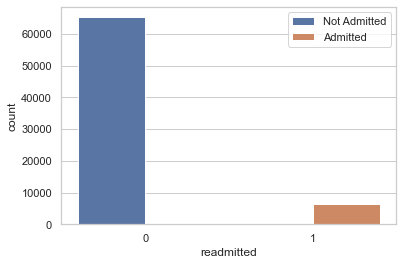

<Figure size 432x288 with 0 Axes>

In [21]:
# plt.figure()
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'readmitted', data = df, hue = 'readmitted')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = ['Not Admitted', 'Admitted'])
plt.figure()

In [97]:
df['readmitted'].value_counts(dropna=False)

0    65222
1     6293
Name: readmitted, dtype: int64

### RESEARCH

In [ ]:
# They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes), resulting in hundreds of distinct categories. One way to simplify this, is by grouping every ICD-9 code value into one of 18 generic health problems, depending on the first 3 digits as following:

# List of ICD-9 codes 001–139: infectious and parasitic diseases
# List of ICD-9 codes 140–239: neoplasms
# List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
# List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
# List of ICD-9 codes 290–319: mental disorders
# List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
# List of ICD-9 codes 390–459: diseases of the circulatory system
# List of ICD-9 codes 460–519: diseases of the respiratory system
# List of ICD-9 codes 520–579: diseases of the digestive system
# List of ICD-9 codes 580–629: diseases of the genitourinary system
# List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
# List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
# List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
# List of ICD-9 codes 740–759: congenital anomalies
# List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
# List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
# List of ICD-9 codes 800–999: injury and poisoning
# List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

In [22]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?',-1)
df['diag_2'] = df['diag_2'].replace('?',-1)
df['diag_3'] = df['diag_3'].replace('?',-1)
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

# Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

In [23]:
categorical_features = ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','diag_1', 'diag_2', 'diag_3', 'readmitted']
rejected_features = []
for col in categorical_features : 
    df_crosstab = pd.crosstab(df['readmitted'],  df[col], margins = False) 

    stat, p, dof, expected = scipy.stats.chi2_contingency(df_crosstab)
    if p < 0.4 :
        print(p, col, 'is significant')
    else:
        print(p, col, 'is not significant')
        rejected_features.append(col)

0.5346920045915386 gender is not significant
0.01750064068640562 admission_type_id is significant
1.3232043949603843e-295 discharge_disposition_id is significant
0.36205128123276453 admission_source_id is significant
3.131780022573835e-22 diag_1 is significant
3.131780022573835e-22 diag_2 is significant
3.407310052111208e-10 diag_3 is significant
0.0 readmitted is significant


In [24]:
numeric_features = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'A1Cresult','max_glu_serum','metformin','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','insulin', 'change', 'diabetesMed']

for col in numeric_features :
    rho , pval = scipy.stats.spearmanr(df['readmitted'], df[col])
    if pval < 0.4 : 
        print(col, 'is significant')
    else : 
        print(col, 'is not significant')
        rejected_features.append(col)

age is significant
time_in_hospital is significant
num_lab_procedures is significant
num_procedures is not significant
num_medications is significant
number_outpatient is significant
number_emergency is significant
number_inpatient is significant
number_diagnoses is significant
A1Cresult is significant
max_glu_serum is significant
metformin is significant
glimepiride is not significant
glipizide is significant
glyburide is significant
pioglitazone is not significant
rosiglitazone is not significant
insulin is significant
change is significant
diabetesMed is not significant


In [ ]:
rejected_features

### EDA according to features

#### Clearly if discharge disposition id is 1,2,6 and 22 the patient will readmit.

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x  = 'discharge_disposition_id', data = df, hue = 'readmitted')

####  If patient has not admitted in the past or admitted very few times the chance that he will readmit is very low

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
sns.countplot(x  = 'number_inpatient', data = df, hue = 'readmitted')


In [ ]:
fig = plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'admission_source_id', hue = 'readmitted', data = df)

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'age', hue = 'readmitted', data = df)

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
ax = fig.add_subplot(111)

sns.countplot(df[df.readmitted == 1].race.values)
ax.set_title('Readmitted Patient')

fig = plt.figure(figsize = (10, 5)) 
ax = fig.add_subplot(111)
sns.countplot(df[df.readmitted == 0].race.values)
ax.set_title('Not Readmitted Patient')

In [ ]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 7,figsize=(20, 4), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['metformin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[0].set_title('metformin Dosage')
ax[1].pie(df['glimepiride'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[1].set_title('glimepiride Dosage')
ax[2].pie(df['glipizide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[2].set_title('glipizide Dosage')
ax[3].pie(df['glyburide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[3].set_title('glyburide Dosage')
ax[4].pie(df['pioglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[4].set_title('pioglitazone Dosage')
ax[5].pie(df['rosiglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[5].set_title('rosiglitazone Dosage')
ax[6].pie(df['insulin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Down', 'Up'])
ax[6].set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')
plt.show()

## DATA PREPROCESSING

In [ ]:
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)


In [ ]:
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [ ]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

In [ ]:
#Naive Bayes
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

#KNN
knn = KNeighborsClassifier() 
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

#SVM
svm = SVC() 
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

#Randon Forest
rfm = RandomForestClassifier() 
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

#Gradient Boosting
gbm = GradientBoostingClassifier() 
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

In [ ]:
results = [
    {
        "Model":'Gaussian Naive Bayes',
    'f1_score':metrics.f1_score(y_val, nbm_pred,average='micro')
    },
    {
        'Model':'K-Nearest Neighbor',
       'f1_score':metrics.f1_score(y_val, knn_pred,average='micro')
      },
    {
        'Model':'SVM',
       'f1_score': metrics.f1_score(y_val, svm_pred,average='micro')
    },
    {
        'Model':'Random Forest',
       'f1_score': metrics.f1_score(y_val, rfm_pred,average='micro')
    },
    {
        'Model':'Gradient Boost',
       'f1_score': metrics.f1_score(y_val, gbm_pred,average='micro')
    }
    ]

In [ ]:
results_df = pd.DataFrame(results)

# WINNER

In [ ]:
results_df[results_df['f1_score'] == results_df['f1_score'].max()]

In [ ]:
print('\nGaussian Naive Bayes:')
print('---------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

print('\nK-Nearest Neighbor:')
print('---------------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

print('\nSVM:')
print('------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

print('\nRandom Forest:')
print('----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

print('\nGradient Boost:')
print('-----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))

# Feature Importance Score

In [ ]:
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')